<a href="https://colab.research.google.com/github/shajarian/BigData/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Author: Shaghayegh (Shirley) Shajarian
# Student ID:
```



Step 1: Check for Java Installation

In [ ]:
!java -version
!readlink -f /usr/bin/java | sed "s:bin/java::"

openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
/usr/lib/jvm/java-11-openjdk-amd64/


Step 2: **Download and Extract Hadoop**

Download the latest version of Hadoop. As of my last update, let's assume the latest is Hadoop 3.3.6, but you should check the official Apache Hadoop website for the most current version.

In [ ]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
!tar -xzvf hadoop-3.3.6.tar.gz
!cp -r hadoop-3.3.6/ /usr/local/

Streaming output truncated to the last 5000 lines.
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/BufferSizeParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/DeleteOpParam.Op.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/PutOpParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/RenameOptionSetParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/XAttrEncodingParam.

Step 3: Set Java and Hadoop Environment Variables

Set the JAVA_HOME environment variable based on the Java path found in Step 1. Then, configure the Hadoop environment variables.

In [ ]:
# Set JAVA_HOME
%env JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

# Set HADOOP_HOME
%env HADOOP_HOME=/usr/local/hadoop-3.3.6

# Add Hadoop bin/ and sbin/ to PATH
import os
os.environ["PATH"] += os.pathsep + os.pathsep.join([f"{os.environ['HADOOP_HOME']}/bin", f"{os.environ['HADOOP_HOME']}/sbin"])

env: JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64
env: HADOOP_HOME=/usr/local/hadoop-3.3.6


Step 4: Test Hadoop Installation

In [ ]:
!/usr/local/hadoop-3.3.6/bin/hadoop version

Hadoop 3.3.6
Source code repository https://github.com/apache/hadoop.git -r 1be78238728da9266a4f88195058f08fd012bf9c
Compiled by ubuntu on 2023-06-18T08:22Z
Compiled on platform linux-x86_64
Compiled with protoc 3.7.1
From source with checksum 5652179ad55f76cb287d9c633bb53bbd
This command was run using /usr/local/hadoop-3.3.6/share/hadoop/common/hadoop-common-3.3.6.jar


Step 5: Run a Sample Hadoop Job

In [ ]:
# Create input files
!echo "Hello Hadoop" > /tmp/input.txt
!echo "Hello Cloud" >> /tmp/input.txt

#Copy Input Files to Hadoop's Local Filesystem
!mkdir /tmp/input
!cp /tmp/input.txt /tmp/input

In [ ]:
text_f = "This blog is exclusive for all the people who are interested in learning one of the trending in current IT industry. \
This course is suitable for students, teacher, IT engineer, freshers etc., \
It talks about the spark with python (pyspark) from beginner till experts."

In [ ]:
text_f

'This blog is exclusive for all the people who are interested in learning one of the trending in current IT industry. This course is suitable for students, teacher, IT engineer, freshers etc., It talks about the spark with python (pyspark) from beginner till experts.'

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4967f7fa9d9b845042ca42e18b123277a866a7d558844ab9c9bc8fc221380e65
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Run mapreduce job

!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar grep /tmp/input /tmp/output 'Hello'

2024-03-15 21:10:02,002 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-03-15 21:10:02,398 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-03-15 21:10:02,398 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-03-15 21:10:03,010 INFO input.FileInputFormat: Total input files to process : 1
2024-03-15 21:10:03,095 INFO mapreduce.JobSubmitter: number of splits:1
2024-03-15 21:10:03,681 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local323338715_0001
2024-03-15 21:10:03,681 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-03-15 21:10:04,346 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2024-03-15 21:10:04,347 INFO mapreduce.Job: Running job: job_local323338715_0001
2024-03-15 21:10:04,359 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2024-03-15 21:10:04,380 INFO output.PathOutputCommitterFactory: No output committer factory defined, defaultin

In [ ]:
# Check the output

!cat /tmp/output/*

2	Hello


**Installation of spark:**

Step 1: Install Java

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

Step 2: Download and Install Apache Spark:

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz

Step 3: Set Environment Variables

Set the JAVA_HOME and SPARK_HOME environment variables, and update the PATH to include Spark's bin directory.

In [ ]:
import os

# Set JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

# Set SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# Add Spark and Hadoop bin/ directories to PATH
os.environ["PATH"] += os.pathsep + f"{os.environ['SPARK_HOME']}/bin:{os.environ['SPARK_HOME']}/sbin"

Step 4: Install findspark

findspark is a Python library that makes it easier to find Spark and add its libraries to your Python projects.

In [ ]:
!pip install -q findspark
!pip install pyspark

Step 5: Initialize Spark

Use findspark to initialize Spark in your notebook. This will allow you to import and use Spark in your projects.

In [ ]:
import findspark
findspark.init()

Step 6: Start a SparkSession

The SparkSession object is the entry point to programming Spark with the Dataset and DataFrame API.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName("Colab_Spark")\
        .getOrCreate()

In [ ]:
spark.version

In [ ]:
spark

You can try creating a DataFrame and performing a simple operation:

In [ ]:
df = spark.createDataFrame([{"Hello": "World"} for x in range(1000)])
df.show(5)

+-----+
|Hello|
+-----+
|World|
|World|
|World|
|World|
|World|
+-----+
only showing top 5 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import Row

# Create SparkSession
spark = SparkSession.builder \
    .appName("Create DataFrame from RDD") \
    .getOrCreate()

# Given toy data
data = [
    {"Category": 'A', "ID": 1, "Value": 121.44, "Truth": True},
    {"Category": 'B', "ID": 2, "Value": 300.01, "Truth": False},
    {"Category": 'C', "ID": 3, "Value": 10.99, "Truth": None},
    {"Category": 'E', "ID": 4, "Value": 33.87, "Truth": True}
]

# a) Code to create DataFrame from RDD
rdd = spark.sparkContext.parallelize(data)
df_from_rdd = spark.createDataFrame(rdd)
df_from_rdd.show()

# b) Code for creating DataFrame from CSV, TXT, and JSON
df_from_csv = spark.read.csv("path_to_csv_file.csv", inferSchema=True, header=True)
df_from_csv.show()

df_from_txt = spark.read.text("path_to_txt_file.txt")
# Additional processing might be needed depending on the structure of the text file
# For example, if it's a CSV formatted text file, you could use:
# df_from_txt = spark.read.option("delimiter", ",").csv("path_to_txt_file.txt", inferSchema=True, header=True)

df_from_json = spark.read.json("path_to_json_file.json")
df_from_json.show()

# Stop the SparkSession
spark.stop()

+--------+---+-----+------+
|Category| ID|Truth| Value|
+--------+---+-----+------+
|       A|  1| true|121.44|
|       B|  2|false|300.01|
|       C|  3| NULL| 10.99|
|       E|  4| true| 33.87|
+--------+---+-----+------+



AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/path_to_csv_file.csv.

**Connecting Google Drive to Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# For Unmounting
#drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"


'06 29.gdoc'
'10 11.gdoc'
'10 25.gdoc'
'10 4.gdoc'
'11 15.gdoc'
'11 29.gdoc'
'1 24.gdoc'
'15 6.gdoc'
'2 14.gdoc'
'2 28 (1).gdoc'
'2 28.gdoc'
'3 16.gslides'
'3 3.gslides'
'4 27.gslides'
'4 6.gslides'
'5 18 2023.gdoc'
'5 18.gslides'
'5 25.gdoc'
'5 31.gdoc'
'6 15.gdoc'
'6 22.gdoc'
'7 13.gdoc'
'7 20, 7 27.gdoc'
'8 17.gdoc'
'8 30.gdoc'
'9 13.gdoc'
'9 27.gdoc'
'AdvancedSecurity 2 27.gdoc'
 Algorithm.gdoc
 Algorithms-New.gslides
 B612_20160505_171130.jpg
'BenyaminTabarsiResume - April ’23.docx'
 Certification
 checkpoint-progress.gdoc
 CNN.pdf
'Code-Shaghayegh Shajarian.gdoc'
'Colab Notebooks'
'Copy of Artificial intelligence-driven autonomous optical.pdf'
'Copy of Copy of Copy of ConceptExplorer.ipynb'
'Copy of finalRM.gslides'
'Copy of ncat_external-and-internal-presentations_template_r51 (1).gslides'
'Copy of Presentation 3 (1).gslides'
'Copy of Presentation 3.gslides'
 CV
'DDoSNet: A Deep-Learning Model for Detecting Network Attacks.gslides'
'Deep Learning'
'DL with Shirley'
'Document for

In [ ]:
!unzip -o "/content/drive/My Drive/Semester 3/Big Data/HW1/Dataset.zip" -d "/content/dataset"

Archive:  /content/drive/My Drive/Semester 3/Big Data/HW1/Dataset.zip
  inflating: /content/dataset/Dataset/mcar.txt  
  inflating: /content/dataset/Dataset/seeds_dataset.txt  
  inflating: /content/dataset/Dataset/shakespeare.txt  
  inflating: /content/dataset/Dataset/TestData1.txt  
  inflating: /content/dataset/Dataset/TrainData1.txt  
  inflating: /content/dataset/Dataset/training.txt  
  inflating: /content/dataset/Dataset/TrainLabel1.txt  
  inflating: /content/dataset/Dataset/Validation.txt  
  inflating: /content/dataset/Dataset/wc.txt  


**2. Multi-Class Classification:**

For the multiclass classification problem, there were one dataset that contain missing values.
For example, TrainData1, TestData1 and TrainData3 contain some missing values. Therefore,
the first approach needs to handle the missing values for selecting the features. Then
compare the accuracy on train dataset to find out which classifier gives best result for each
dataset with cross validation to verify the accuracy based on test dataset. Implementation
needs to be done using PySpark with Google Colab.

Hint:
 Missing Value Estimation
 (KNN method for imputation of the missing values)
 Dimensionality Reduction
 Use Several Classifiers/ Ensemble Method
 Logistic Regression (with different c values) Random Forest (with different estimator values)
 SVM (with different kernels)
 KNN (with k = 1,2,5,10,20)
 K (3,5,10) Fold Cross Validation
 Performance Comparison
 Classification Accuracy, Precision, Recall (Sensitivity), Specificity, F1
Score
 AUC, ROC Curve

In [ ]:
!unzip -o "/content/drive/My Drive/Semester 3/Big Data/HW1/wine.zip" -d "/content/dataset"

Archive:  /content/drive/My Drive/Semester 3/Big Data/HW1/wine.zip
  inflating: /content/dataset/Index  
  inflating: /content/dataset/wine.data  
  inflating: /content/dataset/wine.names  


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, FloatType, IntegerType

spark = SparkSession.builder.appName('wine_classification').getOrCreate()

# Loading the Wine Dataset
# Define the schema based on the dataset description
schema = StructType([
    StructField("Label", IntegerType()),
    StructField("Alcohol", FloatType()),
    StructField("MalicAcid", FloatType()),
    StructField("Ash", FloatType()),
    StructField("AlcalinityOfAsh", FloatType()),
    StructField("Magnesium", IntegerType()),
    StructField("TotalPhenols", FloatType()),
    StructField("Flavanoids", FloatType()),
    StructField("NonflavanoidPhenols", FloatType()),
    StructField("Proanthocyanins", FloatType()),
    StructField("ColorIntensity", FloatType()),
    StructField("Hue", FloatType()),
    StructField("OD280_OD315OfDilutedWines", FloatType()),
    StructField("Proline", IntegerType()),
])

# Load the dataset
df = spark.read.csv("/content/dataset/wine.data", schema=schema, header=False)
df.show()

+-----+-------+---------+----+---------------+---------+------------+----------+-------------------+---------------+--------------+----+-------------------------+-------+
|Label|Alcohol|MalicAcid| Ash|AlcalinityOfAsh|Magnesium|TotalPhenols|Flavanoids|NonflavanoidPhenols|Proanthocyanins|ColorIntensity| Hue|OD280_OD315OfDilutedWines|Proline|
+-----+-------+---------+----+---------------+---------+------------+----------+-------------------+---------------+--------------+----+-------------------------+-------+
|    1|  14.23|     1.71|2.43|           15.6|      127|         2.8|      3.06|               0.28|           2.29|          5.64|1.04|                     3.92|   1065|
|    1|   13.2|     1.78|2.14|           11.2|      100|        2.65|      2.76|               0.26|           1.28|          4.38|1.05|                      3.4|   1050|
|    1|  13.16|     2.36|2.67|           18.6|      101|         2.8|      3.24|                0.3|           2.81|          5.68|1.03|         

In [ ]:
from pyspark.sql.functions import col, sum as _sum

# Calculate the number of missing (null) values in each column
missing_values = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

+-----+-------+---------+---+---------------+---------+------------+----------+-------------------+---------------+--------------+---+-------------------------+-------+
|Label|Alcohol|MalicAcid|Ash|AlcalinityOfAsh|Magnesium|TotalPhenols|Flavanoids|NonflavanoidPhenols|Proanthocyanins|ColorIntensity|Hue|OD280_OD315OfDilutedWines|Proline|
+-----+-------+---------+---+---------------+---------+------------+----------+-------------------+---------------+--------------+---+-------------------------+-------+
|    0|      0|        0|  0|              0|        0|           0|         0|                  0|              0|             0|  0|                        0|      0|
+-----+-------+---------+---+---------------+---------+------------+----------+-------------------+---------------+--------------+---+-------------------------+-------+



So there is no missing value in this dataset.

In [ ]:
# Split dataset
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
train_data.show()
test_data.show()

Training Dataset Count: 149
Test Dataset Count: 29
+-----+-------+---------+----+---------------+---------+------------+----------+-------------------+---------------+--------------+----+-------------------------+-------+
|Label|Alcohol|MalicAcid| Ash|AlcalinityOfAsh|Magnesium|TotalPhenols|Flavanoids|NonflavanoidPhenols|Proanthocyanins|ColorIntensity| Hue|OD280_OD315OfDilutedWines|Proline|
+-----+-------+---------+----+---------------+---------+------------+----------+-------------------+---------------+--------------+----+-------------------------+-------+
|    1|  12.85|      1.6|2.52|           17.8|       95|        2.48|      2.37|               0.26|           1.46|          3.93|1.09|                     3.63|   1015|
|    1|  12.93|      3.8|2.65|           18.6|      102|        2.41|      2.41|               0.25|           1.98|           4.5|1.03|                     3.52|    770|
|    1|  13.05|     1.73|2.04|           12.4|       92|        2.72|      3.27|              

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Convert features to a vector
assembler = VectorAssembler(inputCols=df.columns[1:], outputCol="features")
# train_data = assembler.transform(train_data)
# test_data = assembler.transform(test_data)

# Apply PCA
n_components = 5
pca = PCA(k=n_components, inputCol="features", outputCol="pcaFeatures")

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol='pcaFeatures', labelCol='Label', maxIter=10)

pipeline = Pipeline(stages=[assembler, pca, lr])

# Parameter grid for Logistic Regression
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [1.0/c for c in [0.01, 0.1, 1.0, 10.0]]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy"),
                          numFolds=5)

cvModel = crossval.fit(train_data)

In [ ]:
from pyspark.sql.types import FloatType
from pyspark.mllib.evaluation import MulticlassMetrics

predictions = cvModel.transform(test_data)

# Convert the predictions to RDD format for MulticlassMetrics
predictionAndLabels = predictions \
    .select(predictions["prediction"].cast(FloatType()), predictions["Label"].cast(FloatType())) \
    .rdd

# Instantiate the MulticlassMetrics object
metrics = MulticlassMetrics(predictionAndLabels)

print("Logistic Regression - Class-specific metrics:")
labels = predictionAndLabels.map(lambda lp: lp[1]).distinct().collect()
for label in sorted(labels):
      print(f"Class {label} Precision: {metrics.precision(label)}")
      print(f"Class {label} Recall: {metrics.recall(label)}")
      print(f"Class {label} F1 Score: {metrics.fMeasure(label, beta=1.0)}")

# Overall metrics using MulticlassClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print(f"Logistic Regression - Overall Accuracy: {accuracy}")
print(f"Logistic Regression - Overall F1 Score: {f1_score}")

# For AUC and ROC Curve in a multiclass setting, PySpark doesn't support it directly.

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Logistic Regression - Class-specific metrics:
Class 1.0 Precision: 1.0
Class 1.0 Recall: 1.0
Class 1.0 F1 Score: 1.0
Class 2.0 Precision: 1.0
Class 2.0 Recall: 1.0
Class 2.0 F1 Score: 1.0
Class 3.0 Precision: 1.0
Class 3.0 Recall: 1.0
Class 3.0 F1 Score: 1.0
Logistic Regression - Overall Accuracy: 1.0
Logistic Regression - Overall F1 Score: 1.0


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
classes = np.unique(predictions_pd['Label'])
y_true = label_binarize(predictions_pd['Label'], classes=classes)

# Assuming the 'probability' column contains lists of probabilities for each class
y_score = np.array(list(predictions_pd['probability']))

# Compute ROC curve and ROC area for each class
n_classes = y_true.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

for i in range(n_classes):
    print(f"Class {i} AUC: {roc_auc[i]:.2f}")

NameError: name 'predictions_pd' is not defined

Setup Random Forest Classifier with Cross-Validation (with different estimator values)

In [ ]:
# Random Forest (with different estimator values)

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='pcaFeatures', labelCol='Label')
pipeline = Pipeline(stages=[assembler, pca, rf])

# Define a parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50, 100]) \
    .build()

# Setup cross-validation
crossval_rf = CrossValidator(estimator=pipeline,
                             estimatorParamMaps=paramGrid,
                             evaluator=MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy"),
                             numFolds=5)

# Fit the model
cvModel_rf = crossval_rf.fit(train_data)

After training, evaluate the best model (Random Forest) from cross-validation on the test dataset across multiple metrics.

In [ ]:
# Make predictions on the test data
predictions_rf = cvModel_rf.transform(test_data)

# Convert predictions and labels to float type, then to RDD for MulticlassMetrics
predictionAndLabels_rf = predictions_rf.select(predictions_rf["prediction"].cast(FloatType()),
                                               predictions_rf["Label"].cast(FloatType())).rdd


metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

# Class-specific metrics
print("Random Forest - Class-specific metrics:")
labels_rf = predictionAndLabels_rf.map(lambda lp: lp[1]).distinct().collect()
for label in sorted(labels_rf):
    print(f"Class {label} Precision: {metrics_rf.precision(label)}")
    print(f"Class {label} Recall: {metrics_rf.recall(label)}")
    print(f"Class {label} F1 Score: {metrics_rf.fMeasure(label, beta=1.0)}")

# Overall metrics using MulticlassClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions_rf, {evaluator.metricName: "accuracy"})
f1_score = evaluator.evaluate(predictions_rf, {evaluator.metricName: "f1"})
print(f"Random Forest - Overall Accuracy: {accuracy}")
print(f"Random Forest - Overall F1 Score: {f1_score}")

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Random Forest - Class-specific metrics:
Class 1.0 Precision: 0.9333333333333333
Class 1.0 Recall: 1.0
Class 1.0 F1 Score: 0.9655172413793104
Class 2.0 Precision: 1.0
Class 2.0 Recall: 0.8888888888888888
Class 2.0 F1 Score: 0.9411764705882353
Class 3.0 Precision: 1.0
Class 3.0 Recall: 1.0
Class 3.0 F1 Score: 1.0
Random Forest - Overall Accuracy: 0.9655172413793104
Random Forest - Overall F1 Score: 0.9650975729173952


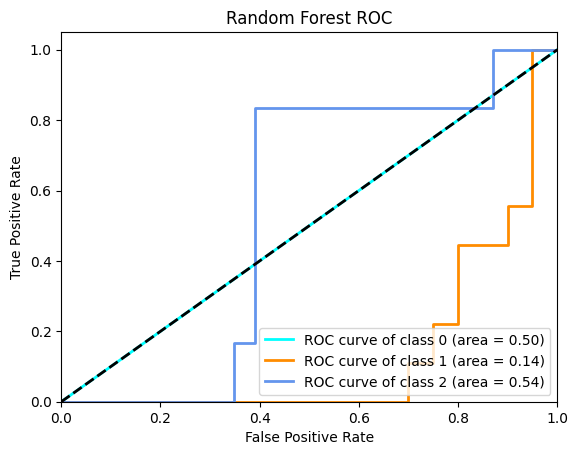

Class 0 AUC: 0.50
Class 1 AUC: 0.14
Class 2 AUC: 0.54


In [ ]:
predictions_rf_pd = predictions_rf.select(["probability", "Label"]).toPandas()

y_true_rf = label_binarize(predictions_rf_pd['Label'], classes=np.unique(predictions_rf_pd['Label']))
y_score_rf = np.array(list(predictions_rf_pd['probability']))

fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
n_classes_rf = y_true_rf.shape[1]
for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_true_rf[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes_rf), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

for i in range(n_classes_rf):
    print(f"Class {i} AUC: {roc_auc_rf[i]:.2f}")

PySpark's MLlib currently supports LinearSVC for SVM classification

In [ ]:
# from pyspark.ml.classification import OneVsRest
# from pyspark.ml.classification import LinearSVC

# # Initialize the base classifier
# lsvc = LinearSVC(maxIter=10, regParam=0.1)

# # Create the OneVsRest classifier
# ovr = OneVsRest(classifier=lsvc, featuresCol="pcaFeatures", labelCol="Label")

# # Since OneVsRest can be computationally expensive, and to ensure the example runs, we're not using CrossValidator here.
# pipeline_svm_ovr = Pipeline(stages=[assembler, pca, ovr])

# # Fit the model
# model_svm_ovr = pipeline_svm_ovr.fit(train_data)

# # Make predictions
# predictions_svm_ovr = model_svm_ovr.transform(test_data)

# # Evaluate the model
# evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")
# accuracy_svm_ovr = evaluator.evaluate(predictions_svm_ovr)
# print("Accuracy:", accuracy_svm_ovr)

# # Evaluating F1 Score
# f1_score_svm_ovr = evaluator.evaluate(predictions_svm_ovr, {evaluator.metricName: "f1"})
# print("F1 Score:", f1_score_svm_ovr)

Given the limitations within PySpark for multiclass SVM with non-linear kernels or directly using LinearSVC in a multiclass context without issues, and the practical challenges demonstrated, it might be worth considering alternative models supported for multiclass classification natively in PySpark or using other tools better suited for SVM with multiclass support, like scikit-learn, for tasks requiring SVM with non-linear kernels or specific SVM configurations not directly supported in PySpark.

 KNN isn't directly supported in PySpark MLlib

So far we have RF and LR implementation for this task. However we can leverage other classifiers too.

Decision Tree Classifier:

Decision Trees are a non-linear classifier that can handle multiclass classification tasks directly.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='pcaFeatures', labelCol='Label')

# Pipeline
pipeline_dt = Pipeline(stages=[assembler, pca, dt])

# Parameter grid for Decision Tree
paramGrid_dt = ParamGridBuilder().build()  # No parameters for grid search in this example, but you can add some

# Setup cross-validation
crossval_dt = CrossValidator(estimator=pipeline_dt,
                             estimatorParamMaps=paramGrid_dt,
                             evaluator=MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy"),
                             numFolds=5)

# Fit the model
cvModel_dt = crossval_dt.fit(train_data)

# Make predictions
predictions_dt = cvModel_dt.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction")
accuracy_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "accuracy"})
f1_score_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "f1"})
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1 Score:", f1_score_dt)


In [ ]:
predictions_dt_pd = predictions_dt.select(["probability", "Label"]).toPandas()
y_true_dt = label_binarize(predictions_dt_pd['Label'], classes=np.unique(predictions_dt_pd['Label']))
y_score_dt = np.array(list(predictions_dt_pd['probability']))

fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}
n_classes_dt = y_true_dt.shape[1]
for i in range(n_classes_dt):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_true_dt[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes_dt), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

for i in range(n_classes_dt):
    print(f"Class {i} AUC: {roc_auc_dt[i]:.2f}")

Naive Bayes Classifier is another classifier we can use for this task.

the Naive Bayes classifier in PySpark, which requires all feature values to be non-negative. This constraint comes from the fact that the Naive Bayes model, particularly the multinomial and Bernoulli variants, is based on probability calculations that assume non-negative feature values.

Given that PCA can produce negative values as part of its transformation (since it's essentially a projection of your data into a new space where axes can have negative and positive directions), using PCA features directly with Naive Bayes can lead to this issue.

In [ ]:
#Adjusted Naive Bayes Setup (Skipping PCA)
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# Assuming 'df' is your DataFrame and you have 'train_data' and 'test_data'

# Use VectorAssembler to create feature vectors directly from the original data (skipping PCA)
assembler_nb = VectorAssembler(inputCols=df.columns[1:], outputCol="features")

# Initialize Naive Bayes Classifier
nb = NaiveBayes(featuresCol='features', labelCol='Label', modelType="multinomial")

# Setup the pipeline
pipeline_nb = Pipeline(stages=[assembler_nb, nb])

# Fit the model on train data
model_nb = pipeline_nb.fit(train_data)

# Make predictions on test data
predictions_nb = model_nb.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction")
accuracy_nb = evaluator.evaluate(predictions_nb, {evaluator.metricName: "accuracy"})
f1_score_nb = evaluator.evaluate(predictions_nb, {evaluator.metricName: "f1"})
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes F1 Score:", f1_score_nb)

In conclusion, both logistic regression and decision tree have great performance in the wine dataset. Logistic Regression, with its different regularization strengths, offers a robust linear model that excels in scenarios where relationships between the features and the target variable can be approximated linearly. Its performance across various regularization values suggests that the model benefits from adjustments in complexity, effectively managing the trade-off between bias and variance to improve generalization.

On the other hand, the Decision Tree classifier, known for its non-linear decision boundaries, indicates that your dataset might have complex patterns or interactions between features that cannot be captured by linear models alone.   The fact that both Logistic Regression and Decision Trees are identified as suitable indicates the wine dataset features a blend of linearly separable aspects and more complex patterns that benefit from the inherent flexibility of Decision Trees. This combination suggests a nuanced dataset where both simplicity and the ability to capture non-linearities are key to model performance.

**3. Word Count MapReduce:**

For this problem, the first step of is to create a Spark context. Next, you will need to read the
target file into an RDD. You now have an RDD filled with strings, one per line of the file.
Next you will want to split the lines into individual words
Next, you will want to replace each word with a tuple of that word and the number 1. Now,
to get a count of the number of instances of each word, you need only group the
elements of the RDD by key (word) and add up their values. Finally, you can show the results
and stop the context
 Follow the above steps to write a code in Google Colab using PySpark for this word
counting problem with MapReduce operation based on wc.txt dataset to find the
results.



1.   Install PySpark.
2.  Create a Spark context.
3.  Read the target file (wc.txt) into an RDD.
4.  Split the lines into words.
5.  Convert words into key-value pairs (word, 1).
6.  Reduce by key to count the words.
7.  Show the results.
8.  Stop the context.

In [ ]:
from pyspark import SparkContext

# Initialize SparkContext
sc = SparkContext.getOrCreate()

# Read the dataset into an RDD
file_path = '/content/dataset/Dataset/wc.txt'
rdd = sc.textFile(file_path)
for line in rdd.take(5):
    print(line)

word count from Wikipedia the free encyclopedia
the word count is the number of words in a document or passage of text Word counting may be needed when a text
is required to stay within certain numbers of words This may particularly be the case in academia legal
proceedings journalism and advertising Word count is commonly used by translators to determine the price for
the translation job Word counts may also be used to calculate measures of readability and to measure typing


In [ ]:
# Split the lines into words
words = rdd.flatMap(lambda line: line.split(" "))

# Replace each word with a tuple (word, 1)
word_tuples = words.map(lambda word: (word, 1))

# Reduce by key to count the words
word_counts = word_tuples.reduceByKey(lambda a, b: a + b)

# Collect the results
results = word_counts.collect()

# Print the results
for word, count in results:
    print(f"{word}: {count}")

sc.stop()

word: 24
count: 11
from: 2
Wikipedia: 1
the: 38
free: 1
encyclopedia: 1
is: 19
number: 3
of: 25
words: 21
in: 11
a: 28
document: 2
or: 11
passage: 1
text: 8
Word: 3
counting: 6
may: 8
be: 8
needed: 1
when: 2
required: 1
to: 18
stay: 1
within: 1
certain: 2
numbers: 1
This: 2
particularly: 1
case: 1
academia: 1
legal: 1
proceedings: 1
journalism: 1
and: 23
advertising: 1
commonly: 1
used: 4
by: 5
translators: 1
determine: 1
price: 1
for: 10
translation: 1
job: 1
counts: 3
also: 5
calculate: 1
measures: 1
readability: 1
measure: 2
typing: 1
reading: 1
speeds: 1
usually: 3
per: 3
minute: 1
When: 1
converting: 1
character: 2
five: 1
six: 1
characters: 2
generally: 2
Contents: 1
Details: 2
variations: 2
definition: 3
Software: 2
In: 4
fiction: 4
non: 2
See: 1
References: 1
Sources: 1
External: 1
links: 1
section: 2
does: 1
not: 2
cite: 1
any: 2
references: 1
sources: 2
Please: 1
help: 1
improve: 1
this: 2
adding: 1
citations: 1
reliable: 1
Unsourced: 1
material: 1
challenged: 1
removed: 1
Va

**4. Clustering:**

The examined group comprised kernels belonging to three different varieties of wheat: Kama,
Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality
visualization of the internal kernel structure was detected using a soft X-ray technique. It is
non-destructive and considerably cheaper than other more sophisticated imaging techniques
like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray
KODAK plates. Studies were conducted using combine harvested wheat grain originating from
experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences
in Lublin. The data set can be used for the tasks of classification and cluster analysis.
Attribute Information:
To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,6. asymmetry coefficient
7. length of kernel groove.


All of these parameters were real-valued continuous.

a) K-means clustering using PySpark in Google Colab based on the seed.txt dataset

b) Apply Gaussian Mixture Model with the same seed.txt dataset

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.appName("Clustering").getOrCreate()

df = spark.read.csv("/content/dataset/Dataset/seeds_dataset.txt", sep="\t", inferSchema=True, header=False)
df = df.toDF('area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'label')
df
df.show()

+-----+---------+-----------+----------------+---------------+---------------------+-----------------------+-----+
| area|perimeter|compactness|length_of_kernel|width_of_kernel|asymmetry_coefficient|length_of_kernel_groove|label|
+-----+---------+-----------+----------------+---------------+---------------------+-----------------------+-----+
|15.26|    14.84|      0.871|           5.763|          3.312|                2.221|                   5.22|    1|
|14.88|    14.57|     0.8811|           5.554|          3.333|                1.018|                  4.956|    1|
|14.29|    14.09|      0.905|           5.291|          3.337|                2.699|                  4.825|    1|
|13.84|    13.94|     0.8955|           5.324|          3.379|                2.259|                  4.805|    1|
|16.14|    14.99|     0.9034|           5.658|          3.562|                1.355|                  5.175|    1|
|14.38|    14.21|     0.8951|           5.386|          3.312|                2.

In [ ]:
# Prepare the Data for Clustering
assembler = VectorAssembler(inputCols=df.columns[:-1], outputCol="features")
df_vect = assembler.transform(df).select('features')

In [ ]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(3).setSeed(1)  # Set K to 3 since we have three varieties of wheat
model = kmeans.fit(df_vect)

# Make predictions
predictions = model.transform(df_vect)

# Show cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
  5.21753731]
[11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
  5.0742439 ]
[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836]


The "Cluster Centers" you've shared represent the centroids of the clusters found by the K-means algorithm for your dataset. Each centroid is a point in the multidimensional space defined by your features (area, perimeter, compactness, length of kernel, width of kernel, asymmetry coefficient, and length of kernel groove) that represents the average (or mean) values of the features for all points (wheat kernels) assigned to that cluster. Here's what each cluster center means in the context of your wheat kernel dataset:

First Cluster Center:

Area: 14.82
Perimeter: 14.54
Compactness: 0.88
Length of Kernel: 5.59
Width of Kernel: 3.30
Asymmetry Coefficient: 2.71
Length of Kernel Groove: 5.22
This cluster might represent a group of wheat kernels that are relatively large in size (area and perimeter) with moderate compactness and kernel length. They have a somewhat high asymmetry coefficient and kernel groove length.

Second Cluster Center:

Area: 11.99
Perimeter: 13.28
Compactness: 0.85
Length of Kernel: 5.23
Width of Kernel: 2.88
Asymmetry Coefficient: 4.58
Length of Kernel Groove: 5.07
This cluster likely signifies a group of smaller kernels (lower area and width), with lower compactness and a significantly higher asymmetry coefficient, indicating more variation in kernel shape within this group.

Third Cluster Center:

Area: 18.72
Perimeter: 16.30
Compactness: 0.89
Length of Kernel: 6.21
Width of Kernel: 3.72
Asymmetry Coefficient: 3.60
Length of Kernel Groove: 6.07
This cluster seems to represent the largest kernels in terms of area, perimeter, and other dimensions, with high compactness, indicating that these kernels are dense. The asymmetry coefficient is moderately high, and the kernel groove length is the longest among the clusters.

Each cluster center summarizes the typical properties of the kernels in that cluster. The clusters might correspond to different varieties of wheat in your dataset, reflecting how these varieties differ in terms of physical kernel characteristics.

In [ ]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture().setK(3).setSeed(538009335)
model = gmm.fit(df_vect)

# Make predictions
predictions = model.transform(df_vect)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)


Gaussians shown as a DataFrame: 
+-----------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                                                                                               |cov                                                                                                                                                                                                                                                                                                                             

The Gaussian Mixture Model (GMM) results you've shared include both the means of the Gaussian components and their covariance matrices. These are key to understanding the distribution of your wheat kernel data as modeled by the GMM. Here's a breakdown:

GMM Means:
Each mean vector represents the center of a Gaussian component in the feature space. Like the K-means cluster centers, these means indicate the average feature values of the kernels grouped by the GMM. However, GMM considers not just distance but the probability of membership in each cluster, allowing for a more nuanced grouping.

First Component (Gaussian):

Area: 12.00
Perimeter: 13.29
Compactness: 0.85
Length of Kernel: 5.23
Width of Kernel: 2.88
Asymmetry Coefficient: 4.43
Length of Kernel Groove: 5.07
Second Component (Gaussian):

Area: 15.28
Perimeter: 14.76
Compactness: 0.88
Length of Kernel: 5.67
Width of Kernel: 3.35
Asymmetry Coefficient: 3.06
Length of Kernel Groove: 5.34
Third Component (Gaussian):

Area: 19.13
Perimeter: 16.45
Compactness: 0.89
Length of Kernel: 6.25
Width of Kernel: 3.78
Asymmetry Coefficient: 3.47
Length of Kernel Groove: 6.11
These means suggest three groups of wheat kernels with distinct average properties, from smaller, more asymmetric kernels to larger, denser ones.

GMM Covariances:
The covariance matrices provide insight into the variability of each feature within a cluster and the correlations between features. A higher covariance value between two features indicates a stronger relationship. Since the covariance matrices are dense and detailed, I'll provide a general interpretation:

Smaller covariance values (near diagonal) for a feature suggest less variability in that feature within the cluster.
Positive covariance values between two features indicate that as one feature increases, the other tends to increase as well.
Negative covariance values indicate an inverse relationship.
For example, if the area and perimeter features have a high positive covariance in a component, it means that kernels with larger areas tend to have larger perimeters in that group, which is intuitive. The presence of significant off-diagonal values would indicate that the corresponding features are correlated.

The covariance matrices also reflect the shape and orientation of the Gaussian distributions in the multidimensional feature space, affecting how the data points are grouped. Dense clusters with elongated shapes in certain directions or with certain feature correlations are captured through these matrices, offering a richer, probabilistic clustering model compared to K-means, which assumes spherical clusters.

**5. Spark SQL Problem:**

Perform the following operations in Google Colab using PySPark using the mcar.txt dataset

a) Create and display Spark DataFrames

b) Filter the DataFrame to only retain rows with mpg less than 18

c) Compute the average weight of cars by their cylinders using group by or aggregation

d) Select gear of the car for the cylinder values greater or equal to 4 and less or equal than 9

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

# Load the mcar.txt dataset into a DataFrame
df = spark.read.option("header", True).option("inferSchema", True).csv("/content/dataset/Dataset/mcar.txt")

# Display the DataFrame
df.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|                car| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [ ]:
filtered_df = df.filter(df.mpg < 18)
filtered_df.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|                car| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 280C|17.8|  6|167.6|123|3.92| 3.44| 18.9|  1|  0|   4|   4|
|         Merc 450SE|16.4|  8|275.8|180|3.07| 4.07| 17.4|  0|  0|   3|   3|
|         Merc 450SL|17.3|  8|275.8|180|3.07| 3.73| 17.6|  0|  0|   3|   3|
|        Merc 450SLC|15.2|  8|275.8|180|3.07| 3.78| 18.0|  0|  0|   3|   3|
| Cadillac Fleetwood|10.4|  8|472.0|205|2.93| 5.25|17.98|  0|  0|   3|   4|
|Lincoln Continental|10.4|  8|460.0|215| 3.0|5.424|17.82|  0|  0|   3|   4|
|  Chrysler Imperial|14.7|  8|440.0|230|3.23|5.345|17.42|  0|  0|   3|   4|
|   Dodge Challenger|15.5|  8|318.0|150|2.76| 3.52|16.87|  0|  0|   3|   2|
|        AMC Javelin|15.2|  8|304.0|150|3.15|3.435| 17.3|  0|  0|   3|   2|
|         Ca

In [ ]:
from pyspark.sql import functions as F

average_weight_df = df.groupBy("cyl").agg(F.avg("wt").alias("average_weight"))
average_weight_df.show()

+---+------------------+
|cyl|    average_weight|
+---+------------------+
|  6| 3.117142857142857|
|  4| 2.285727272727273|
|  8|3.9992142857142867|
+---+------------------+



In [ ]:
selected_gear_df = df.filter((df.cyl >= 4) & (df.cyl <= 9)).select("gear")
selected_gear_df.show()

+----+
|gear|
+----+
|   4|
|   4|
|   4|
|   3|
|   3|
|   3|
|   3|
|   4|
|   4|
|   4|
|   4|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   4|
|   4|
|   4|
+----+
only showing top 20 rows



**6. NLP Feature Extraction:**

a) Apply HashingTF and IDF in Google Colab using PySPark using the shakespeare.txt
dataset. (calculate DF, IDF, TF-IDF, search for specific keyword in the document)

b) Apply Word2Vec in Google Colab using PySPark using the shakespeare.txt (get word
vectors and find similarities) dataset

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("NLP").getOrCreate()

# Load the dataset
data = spark.read.text("/content/dataset/Dataset/shakespeare.txt")

# Show the first few lines of the dataset
data.show(5)

+--------------------+
|               value|
+--------------------+
|This is the 100th...|
|is presented in c...|
|Library of the Fu...|
|often releases Et...|
|                    |
+--------------------+
only showing top 5 rows



In [ ]:
# Tokenization
from pyspark.ml.feature import Tokenizer

tokenizer = Tokenizer(inputCol="value", outputCol="words")
wordsData = tokenizer.transform(data)

In [ ]:
# Applying HashingTF
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.ml.linalg import SparseVector

# UDF to calculate the non-zero values in a SparseVector, which indirectly gives us DF
def non_zero_values(v):
    return len(v.indices)

non_zero_values_udf = udf(non_zero_values, IntegerType())

df_calc = featurizedData.withColumn("nonZeroValues", non_zero_values_udf("rawFeatures"))
df_summary = df_calc.groupBy("nonZeroValues").count().orderBy("nonZeroValues")

df_summary.show()

+-------------+-----+
|nonZeroValues|count|
+-------------+-----+
|            0|  163|
|            1| 9769|
|            2| 2654|
|            3| 3592|
|            4| 5671|
|            5| 9938|
|            6|16573|
|            7|24207|
|            8|23748|
|            9|16172|
|           10| 7656|
|           11| 3129|
|           12|  980|
|           13|  224|
|           14|   28|
|           16|    1|
+-------------+-----+



In [ ]:
# Calculating IDF
from pyspark.ml.feature import IDF

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

# Show the TF-IDF values
rescaledData.select("features").show()

+--------------------+
|            features|
+--------------------+
|(20,[1,8,9,10,11,...|
|(20,[0,1,3,7,8,9,...|
|(20,[3,8,10,11,12...|
|(20,[0,3,5,7,10,1...|
|(20,[12],[0.03019...|
|(20,[15],[1.01582...|
|(20,[12],[0.03019...|
|(20,[1,5,6,8,9,12...|
|(20,[12],[0.03019...|
|(20,[5,8,10,11,12...|
|(20,[0,1,3,5,8,9,...|
|(20,[1,3,10,11,15...|
|(20,[0,3,8,10,11,...|
|(20,[0,1,2,3,4,9,...|
|(20,[1,2,3,5,8,11...|
|(20,[1,3,4,9,12,1...|
|(20,[0,1,2,4,12,1...|
|(20,[12],[0.03019...|
|(20,[0,1,3,8,9,10...|
|(20,[3,5,10,12,13...|
+--------------------+
only showing top 20 rows



In [ ]:
# Searching for a Specific Keyword: mine
keyword = "mine"
filteredData = wordsData.where(f"array_contains(words, '{keyword}')")
filteredData.show()

+--------------------+--------------------+
|               value|               words|
+--------------------+--------------------+
|  If thou couldst...|[, , if, thou, co...|
|    Mine be thy l...|[, , , , mine, be...|
|    Presume not o...|[, , , , presume,...|
|  And in mine own...|[, , and, in, min...|
|  O'ercharged wit...|[, , o'ercharged,...|
|  Mine eye hath p...|[, , mine, eye, h...|
|  Mine eyes have ...|[, , mine, eyes, ...|
|  Duty so great, ...|[, , duty, so, gr...|
|  Hath dear relig...|[, , hath, dear, ...|
|    As thou being...|[, , , , as, thou...|
|  What can mine o...|[, , what, can, m...|
|  And what is't b...|[, , and, what, i...|
|  All mine was th...|[, , all, mine, w...|
|  When most I win...|[, , when, most, ...|
|  How would (I sa...|[, , how, would, ...|
|  Mine eye and he...|[, , mine, eye, a...|
|  Mine eye, my he...|[, , mine, eye,, ...|
|  My heart, mine ...|[, , my, heart,, ...|
|    As thus, mine...|[, , , , as, thus...|
|  Betwixt mine ey...|[, , betwi

In [ ]:
from pyspark.ml.feature import Word2Vec

# Word2Vec model
word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol="words", outputCol="result")
model = word2Vec.fit(wordsData)

# Transform the model
wordVectors = model.transform(wordsData)

# Show the word vectors
wordVectors.select("result").show()

+--------------------+
|              result|
+--------------------+
|[-0.0079229236262...|
|[0.13032994628883...|
|[0.02549584275111...|
|[0.03163981486365...|
|[-0.0266673229634...|
|[0.35048332810401...|
|[-0.0266673229634...|
|[0.02295003795815...|
|[-0.0266673229634...|
|[-0.2321013717187...|
|[0.27382586449384...|
|[-0.0957396775484...|
|[-0.0043612997280...|
|[0.14243287329251...|
|[0.23499202709645...|
|[0.28285538451746...|
|[0.33323585573169...|
|[-0.0266673229634...|
|[0.00672269755159...|
|[-0.0777975210861...|
+--------------------+
only showing top 20 rows



In [ ]:
word = "girl"
synonyms = model.findSynonyms(word, 5)
synonyms.show()

+----------+------------------+
|      word|        similarity|
+----------+------------------+
|   carries|0.8399894833564758|
|     trunk|0.8354510068893433|
|reputation|0.8316805958747864|
|  interest|0.8229446411132812|
|     bow'd|0.8225164413452148|
+----------+------------------+



**7. Sentiment Analysis Twitter Dataset:**

This problem is for sentiment analysis of Tweets related to the Covid-19 pandemic, which is a
multi-label text classification task. Since the outbreak of coronavirus, it has affected more
than 180 countries where massive losses in the economy and jobs globally and confining
about 58% of the global population are caused. The research on people’s feelings is essential
for keeping mental health and informed about Covid-19.
The training data contains 5000 labeled tweets while the validation data have 2500 pieces of
unlabeled tweets. The training data have 3 columns, containing Tweet ID, Tweet text, and
labels. Note that the orders are shown as Optimistic (0), Thankful (1), Empathetic (2),
Pessimistic (3), Anxious (4), Sad (5), Annoyed (6), Denial (7), Surprise (8), Official report (9),
Joking (10). For example, if the labels are 3 and 6, it means that this piece of the tweet is
labeled as Pessimistic and Annoyed. The prediction needs to be done on the validation
dataset (test data will be considered to justify your work).
 Perform Covid-19 sentiment analysis using Twitter dataset to classify Covid-19 spread
sentiments based on the training.csv and validation.csv file.

In [ ]:
# from pyspark.sql import SparkSession
# from pyspark.sql.types import StructType, StructField, StringType

# # Initialize a Spark session
# spark = SparkSession.builder \
#     .appName("SentimentAnalysis") \
#     .getOrCreate()

# # Load training dataset
# training_data_path = "dataset/Dataset/training.txt"
# training_df = spark.read.option("header", "true").option("inferSchema", "true").csv(training_data_path , sep=",")

# # Show the DataFrame structure
# training_df.printSchema()

# training_df.show()


In [ ]:
# from pyspark.sql.functions import udf, col
# from pyspark.sql.types import IntegerType, ArrayType
# import re

# # Clean Tweet text
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
#     text = re.sub(r'http\S+', '', text) # Remove URLs
#     return text

# clean_text_udf = udf(lambda z: clean_text(z), StringType())
# training_df = training_df.withColumn("CleanedTweet", clean_text_udf(col("Tweet")))

# # Convert labels from string to array of integers
# def to_label_array(label_str):
#     return [int(label) for label in label_str.split()]

# to_label_array_udf = udf(lambda y: to_label_array(y), ArrayType(IntegerType()))
# training_df = training_df.withColumn("LabelArray", to_label_array_udf(col("Labels")))

# training_df.show()


In [ ]:
# from pyspark.ml.feature import Tokenizer, HashingTF, IDF

# # Tokenize text
# tokenizer = Tokenizer(inputCol="CleanedTweet", outputCol="Words")
# wordsData = tokenizer.transform(training_df)

# # Apply HashingTF
# hashingTF = HashingTF(inputCol="Words", outputCol="RawFeatures", numFeatures=20)
# featurizedData = hashingTF.transform(wordsData)

# # Apply IDF
# idf = IDF(inputCol="RawFeatures", outputCol="Features")
# idfModel = idf.fit(featurizedData)
# rescaledData = idfModel.transform(featurizedData)

# rescaledData.show()

In [ ]:
# from pyspark.sql.functions import col, concat_ws

# # Convert the 'LabelArray' array column to a string column
# rescaledData = rescaledData.withColumn("LabelsStr", concat_ws(",", col("LabelArray")))

# # Now, select only the columns that can be directly saved to CSV
# data_to_save = rescaledData.select([c for c in rescaledData.columns if c != "LabelArray"])

# # Write to CSV
# data_to_save.write.csv('dataset/Dataset/training_data.csv', header=True, mode="overwrite")


# import pandas as pd

# # Read the data
# df = pd.read_csv('dataset/Dataset/training_data.csv')

# # Convert 'LabelsStr' back to an array
# df['Labels'] = df['LabelsStr'].apply(lambda x: [int(label) for label in x.split(',') if label])


**Important notes:**

The pyspark cannot do sentiment analysis with multilabel as straighforward as scikit-learn. in the above I tried to convert my preprocessed dataset from pyspark to pandas but it has some errors due to the complexity of the pyspark dataset I provided. Also there is no mention about using pyspark for this question, so I decided to solve this problem using scikit-learn pandas and tenserflow from first. I also commented all codes I've run above.

In [ ]:
!pip install pandas scikit-learn tensorflow

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load the training and validation data
train_df = pd.read_csv('/content/dataset/Dataset/training.txt')
validation_df = pd.read_csv('/content/dataset/Dataset/Validation.txt')

# Convert 'Labels' from string to list of integers
# This line remains the same, assuming 'Labels' is correctly named by the file header
train_df['Labels'] = train_df['Labels'].apply(lambda x: [int(label) for label in x.split()])

# Proceed with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['Labels'])

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already done)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to tweets
train_df['Tweet'] = train_df['Tweet'].apply(preprocess_text)
validation_df['Tweet'] = validation_df['Tweet'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, max_df=0.90, min_df=2)

# Fit the vectorizer on the training tweets and transform the tweets
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Tweet'])

# Transform the validation tweets
X_val_tfidf = tfidf_vectorizer.transform(validation_df['Tweet'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer: one neuron per class
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1788928   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 1923083 (7.34 MB)
Trainable params: 1923083 (7.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Convert TF-IDF matrices to dense format for TensorFlow compatibility
X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()

# Train the model
history = model.fit(X_train_dense, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
71/71 [==============================] - 4s 37ms/step - loss: 0.4796 - accuracy: 0.1093 - val_loss: 0.4177 - val_accuracy: 0.1000
Epoch 2/10
71/71 [==============================] - 3s 47ms/step - loss: 0.4028 - accuracy: 0.1360 - val_loss: 0.3921 - val_accuracy: 0.1860
Epoch 3/10
71/71 [==============================] - 3s 35ms/step - loss: 0.3614 - accuracy: 0.2367 - val_loss: 0.3752 - val_accuracy: 0.2680
Epoch 4/10
71/71 [==============================] - 2s 33ms/step - loss: 0.3150 - accuracy: 0.3362 - val_loss: 0.3713 - val_accuracy: 0.3140
Epoch 5/10
71/71 [==============================] - 2s 31ms/step - loss: 0.2709 - accuracy: 0.3953 - val_loss: 0.3818 - val_accuracy: 0.3060
Epoch 6/10
71/71 [==============================] - 2s 30ms/step - loss: 0.2336 - accuracy: 0.4300 - val_loss: 0.4034 - val_accuracy: 0.3160
Epoch 7/10
71/71 [==============================] - 3s 35ms/step - loss: 0.2011 - accuracy: 0.4573 - val_loss: 0.4213 - val_accuracy: 0.3260
Epoch 8/10
71

In [ ]:
predictions = model.predict(X_val_dense)

# Apply a threshold to determine the label
predicted_labels = (predictions > 0.5).astype(int)

79/79 [==============================] - 1s 5ms/step


In [ ]:
# Convert binary predictions back to labels
predicted_label_sets = mlb.inverse_transform(predicted_labels)

# Print some example tweets with their predicted labels
for i, (tweet, label_set) in enumerate(zip(validation_df['Tweet'].iloc[:10], predicted_label_sets[:10]), start=1):
    print(f"Tweet {i}: {tweet}")
    print(f"Predicted Labels: {', '.join([str(label) for label in label_set])}\n")

Tweet 1: forgot math test failing teacher opening back maybe corona aint bad
Predicted Labels: 4, 10

Tweet 2: corona effected came delhi bihar lakhisarai district mahisona village name pappu khan
Predicted Labels: 4, 5

Tweet 3: make corona end na
Predicted Labels: 0, 10

Tweet 4: imagine coronavirus pandemic big april fool joke government pulled u
Predicted Labels: 10

Tweet 5: howdy ana get married coronavirus update gov
Predicted Labels: 8

Tweet 6: coronavirus live blog allergist immunologist dr purvi parikh answer question
Predicted Labels: 9, 10

Tweet 7: b talking corona hunger killing pple
Predicted Labels: 9, 10

Tweet 8: fuck corona man couldve gone vacation next week state shit doesnt exist
Predicted Labels: 5, 6

Tweet 9: female founded company result le cash hand carry kind unexpected event like covid
Predicted Labels: 9, 10

Tweet 10: anyone gon na come say coronavirus april fool joke
Predicted Labels: 9, 10



So, the quick overview of what we do is:

Data Loading and Preparation: We loaded the training and validation datasets from txt files, handling the data structure correctly, including the multi-label nature of the sentiment labels.

Data Preprocessing: We applied several preprocessing steps to clean the tweet texts, including removing URLs, mentions, hashtags, special characters, and numbers; converting texts to lowercase; tokenizing; removing stopwords; and applying lemmatization.

Feature Engineering: We utilized TF-IDF vectorization to convert the preprocessed tweet texts into numerical features that can be fed into a machine learning model.

Model Building and Training: We constructed a neural network model using TensorFlow, tailored for multi-label classification. The model architecture, including dense layers and dropout for regularization, was designed to capture the complexity of the sentiment analysis task.

Prediction on Validation Data: We used the trained model to predict sentiments on the validation dataset.

Interpreting Predictions: We provided a method for mapping the binary predictions back to the original sentiment labels using the MultiLabelBinarizer's inverse_transform method, allowing for the interpretation of predicted sentiments.

**First attempt: fail**
**2. Multi-Class Classification:**

For the multiclass classification problem, there were one dataset that contain missing values.
For example, TrainData1, TestData1 and TrainData3 contain some missing values. Therefore,
the first approach needs to handle the missing values for selecting the features. Then
compare the accuracy on train dataset to find out which classifier gives best result for each
dataset with cross validation to verify the accuracy based on test dataset. Implementation
needs to be done using PySpark with Google Colab.

Hint:

Missing Value Estimation (KNN method for imputation of the missing values)

Dimensionality Reduction

Use Several Classifiers/ Ensemble Method
1. Logistic Regression (with different c values)
2. Random Forest (with different estimator values)
3. SVM (with different kernels)
4. KNN (with k = 1,2,5,10,20)
5. K (3,5,10) Fold Cross Validation

Performance Comparison:

Classification Accuracy, Precision, Recall (Sensitivity), Specificity, F1
Score, AUC, ROC Curve

The reason missing values are typically handled in training datasets and not in test datasets can be related to the concept of data leakage and maintaining the integrity of the model evaluation process. However, the strategy to handle missing values in test data requires careful consideration. Here's a detailed explanation:

Model Training and Validation
Avoid Data Leakage: During the model training phase, you want to avoid any data leakage from the test set into the training process. Data leakage can happen if information from the test set influences the training process, leading to overly optimistic performance estimates.
Feature Engineering and Selection: Feature engineering, including handling missing values, is done before model training to ensure that the model learns the underlying patterns in the data. If you use information from the test set to impute missing values in the training set (or vice versa), you risk introducing bias.

In [ ]:
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import when, col, count

# # Initialize Spark Session
# spark = SparkSession.builder.appName('MulticlassClassification').getOrCreate()

# # Load datasets
# trainData1 = spark.read.option("inferSchema", "true").option("header", "false").csv("dataset/Dataset/TrainData1.txt", sep="\t")

In [ ]:
# # Define new column names
# num_columns = len(trainData1.columns)
# column_names = ['col' + str(i) for i in range(1, num_columns + 1)]

# # Assign the column names
# trainData1 = trainData1.toDF(*column_names)
# trainData1.show()

In [ ]:
# # Find Missing Values

# from pyspark.sql.functions import col, sum as _sum

# # Calculate the number of missing (null) values in each column
# missing_values = trainData1.select([_sum(col(c).isNull().cast("int")).alias(c) for c in trainData1.columns])
# missing_values.show()

# # There is no Nan value, however there are some values like 1.00000000000000e+99

In [ ]:
# from pyspark.sql.functions import when, mean

# # Replace '1.00000000000000e+99' or similar values with None across all columns
# for c in trainData1.columns:
#     trainData1 = trainData1.withColumn(c, when(col(c) >= 1e+99, None).otherwise(col(c)))

# # Now, count the null values in each column as before
# exprs = [sum(col(c).isNull().cast("int")).alias(c) for c in trainData1.columns]
# trainData1.agg(*exprs).show()

# # Drop rows with missing values in any column
# #trainData1_clean = trainData1.na.drop()

# # Fill missing values with the mean (for numerical columns)
# mean_value = trainData1.select(mean(trainData1['your_numerical_column'])).collect()[0][0]
# trainData1_filled = trainData1.na.fill(mean_value, ['your_numerical_column'])

I encountered error " Py4JJavaError: An error occurred while calling o17620.withColumn.
: java.lang.OutOfMemoryError: Java heap space". So I will try another dataset.